In [2]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle

In [3]:
symbol ="AAPL TSLA SPY AMZN BABA GOOGL MSFT NFLX PYPL COST AAL GC=F"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-01-01",end="2021-01-01")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]

,Date,Open,High,Low,Close
Date,,,,,
2018-12-31,17896.0,38.653761,38.856137,38.153916,38.461140
2019-01-02,17898.0,37.766231,38.731784,37.605305,38.505024
2019-01-03,17899.0,35.106087,35.530346,34.623312,34.669640
2019-01-04,17900.0,35.240192,36.220374,35.062200,36.149662
2019-01-07,17903.0,36.256950,36.288648,35.574236,36.069202
...,...,...,...,...,...
2020-12-24,18620.0,131.124063,133.260869,130.904390,131.773087
2020-12-28,18624.0,133.790085,137.135078,133.310790,136.486053
2020-12-29,18625.0,137.844025,138.582912,134.139554,134.668762


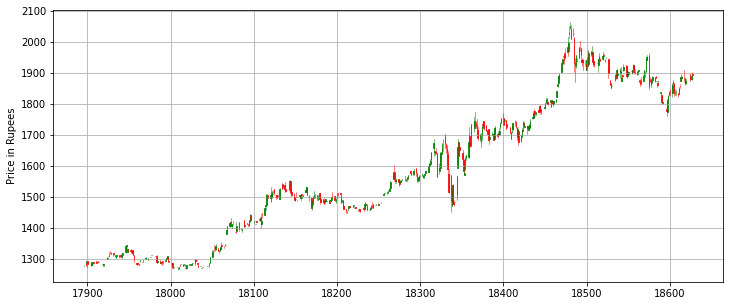

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
candlestick_ohlc(ax,data.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

plt.grid()
plt.ylabel("Price in Rupees")
plt.show()

In [5]:
# create 20 days simple moving average column
data['20_SMA'] = data['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
data['50_SMA'] = data['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
data.head()


,Date,Open,High,Low,Close,20_SMA,50_SMA
Date,,,,,,,
2018-12-31,17896.0,1278.000000,1281.300049,1277.599976,1278.300049,1278.300049,1278.300049
2019-01-02,17898.0,1286.000000,1286.000000,1277.599976,1281.000000,1279.650024,1279.650024
2019-01-03,17899.0,1286.800049,1292.000000,1286.699951,1291.800049,1283.700033,1283.700033
2019-01-04,17900.0,1294.199951,1294.199951,1275.300049,1282.699951,1283.450012,1283.450012
2019-01-07,17903.0,1286.800049,1286.800049,1286.599976,1286.800049,1284.120020,1284.120020


In [6]:
# to get the data for all stocks
MA20_data=[]
MA50_data=[]
for i in range(len(num_name)):
    MA20_data.append(data_frames_separate[i]['Close'].rolling(window = 20, min_periods = 1).mean())
    MA50_data.append(data_frames_separate[i]['Close'].rolling(window = 20, min_periods = 1).mean())
len(MA20_data)


12

In [7]:
# to plot the MAs on the dataframe
for i in range(len(num_name)):
    
    data_frames_separate[i]['20_SMA'] = data_frames_separate[i]['Close'].rolling(window = 20, min_periods = 1).mean()
    data_frames_separate[i]['50_SMA'] = data_frames_separate[i]['Close'].rolling(window = 50, min_periods = 1).mean()
    data_frames_separate[i]['Signal'] = 0.0
    data_frames_separate[i]['Signal'] = np.where(data_frames_separate[i]['20_SMA'] > data_frames_separate[i]['50_SMA'], 1.0, 0.0)
    data_frames_separate[i]['Position'] = data_frames_separate[i]['Signal'].diff()
    #data_frames_separate[i].head()
data_frames_separate[1]


,Date,Open,High,Low,Close,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,
2018-12-31,17896.0,67.557999,67.842003,65.052002,66.559998,66.559998,66.559998,0.0,NaN
2019-01-02,17898.0,61.220001,63.026001,59.759998,62.023998,64.291998,64.291998,0.0,0.0
2019-01-03,17899.0,61.400002,61.880001,59.476002,60.071999,62.885331,62.885331,0.0,0.0
2019-01-04,17900.0,61.200001,63.599998,60.546001,63.537998,63.048498,63.048498,0.0,0.0
2019-01-07,17903.0,64.344002,67.348000,63.549999,66.991997,63.837198,63.837198,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-24,18620.0,642.989990,666.090027,641.000000,661.770020,623.862003,513.927201,1.0,0.0
2020-12-28,18624.0,674.510010,681.400024,660.799988,663.690002,627.758502,518.223401,1.0,0.0
2020-12-29,18625.0,661.000000,669.900024,655.000000,665.989990,632.678003,522.749800,1.0,0.0


In [8]:
list(data_frames_separate[1]["Position"])


[nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [32]:
def plotMA(i):
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data_frames_separate[i]['Close'].plot(color = 'k', label= 'Close') 
    data_frames_separate[i]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
    data_frames_separate[i]['50_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data_frames_separate[i][data_frames_separate[i]['Position'] == 1].index, 
             data_frames_separate[i]['20_SMA'][data_frames_separate[i]['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data_frames_separate[i][data_frames_separate[i]['Position'] == -1].index, 
             data_frames_separate[i]['20_SMA'][data_frames_separate[i]['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price$', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(num_name[i], fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()

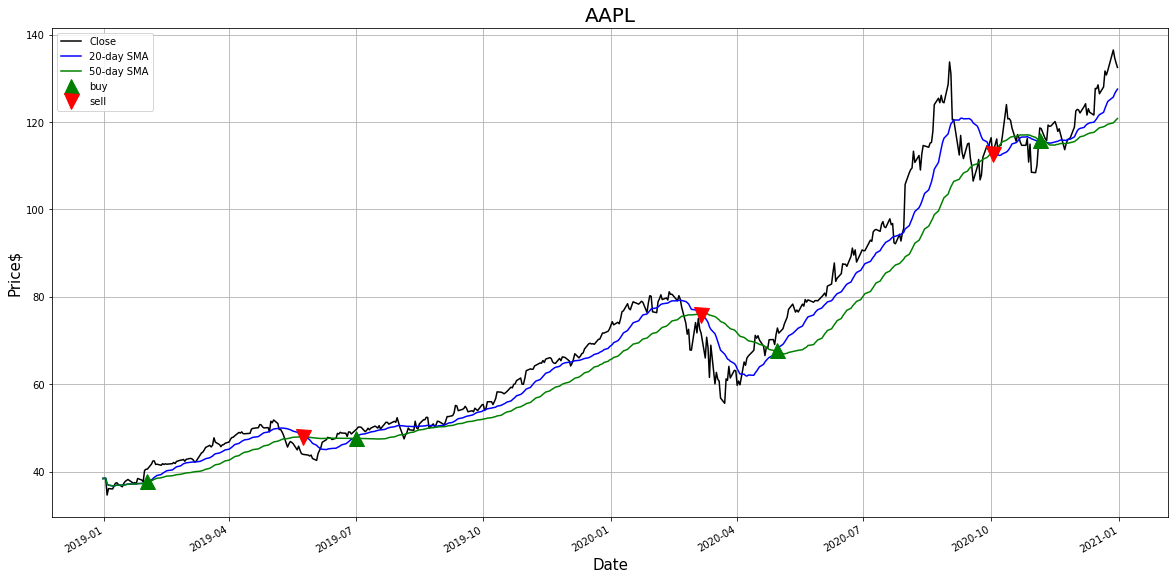

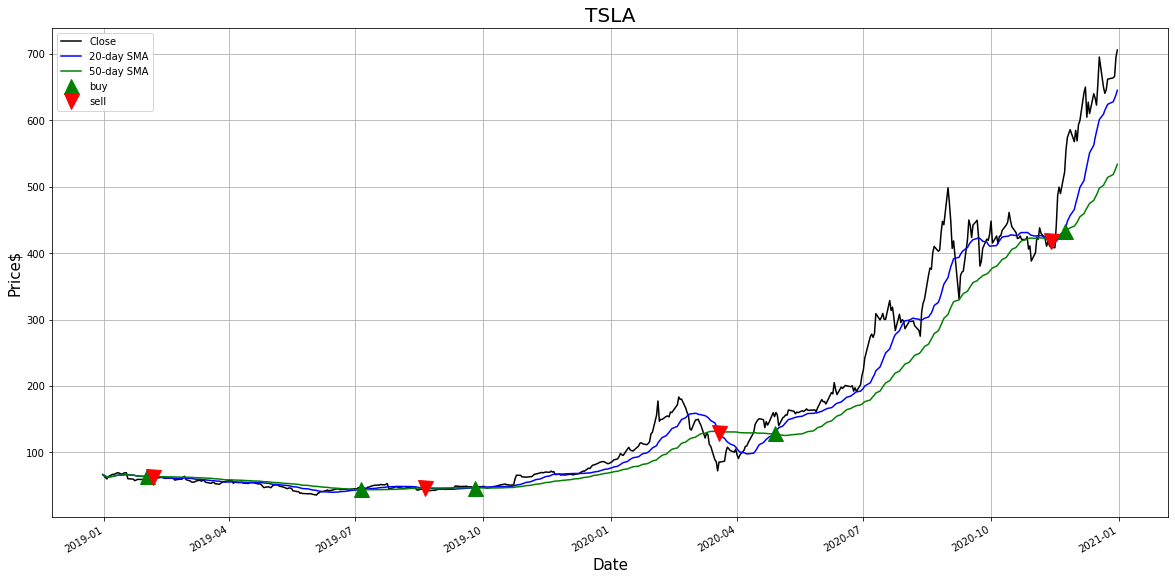

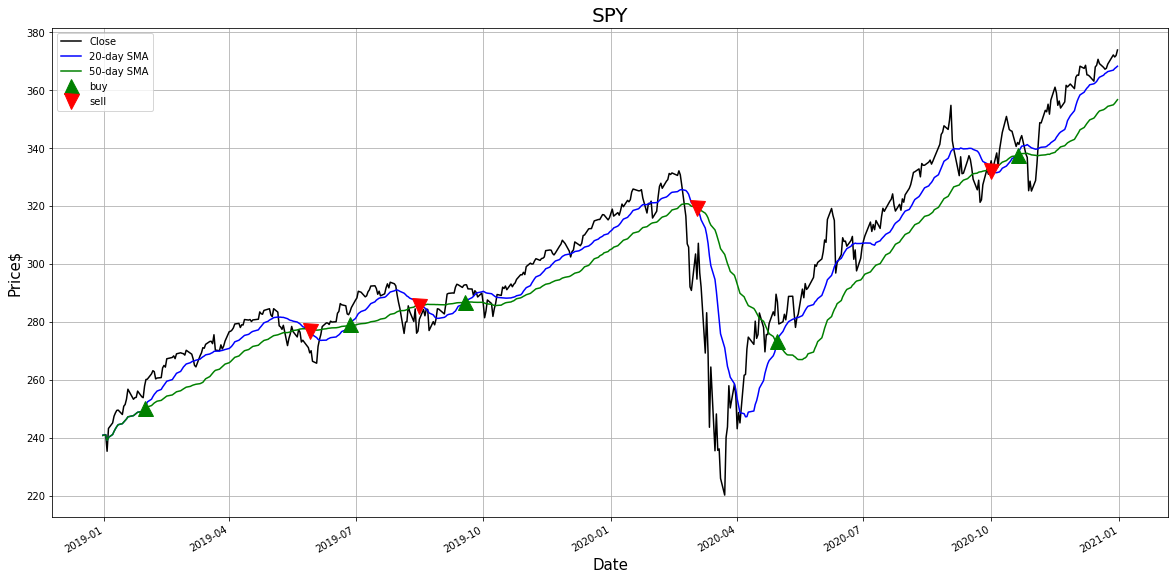

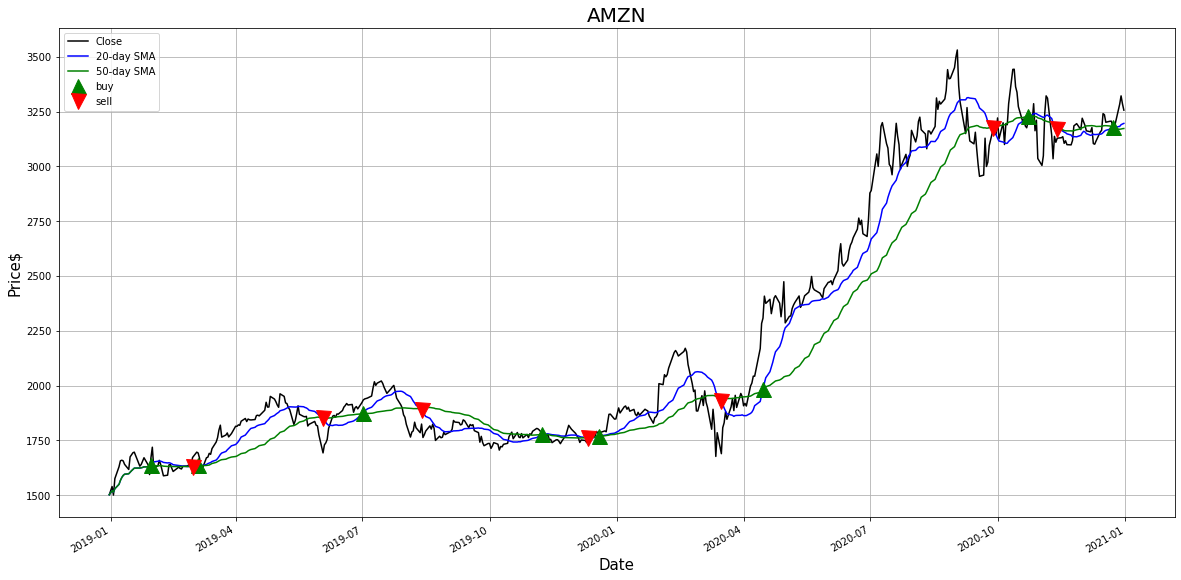

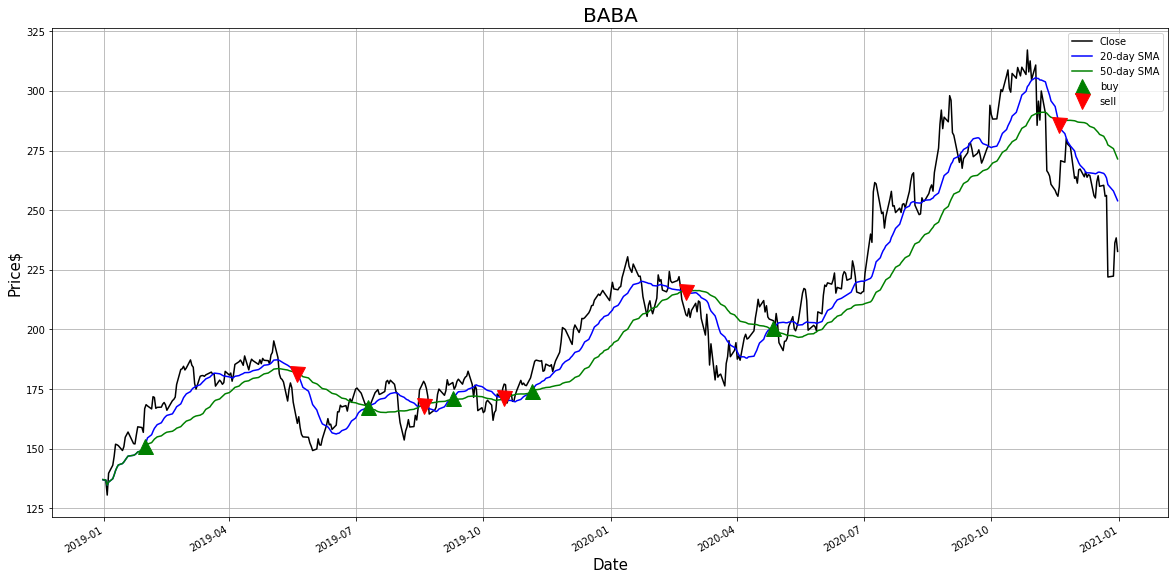

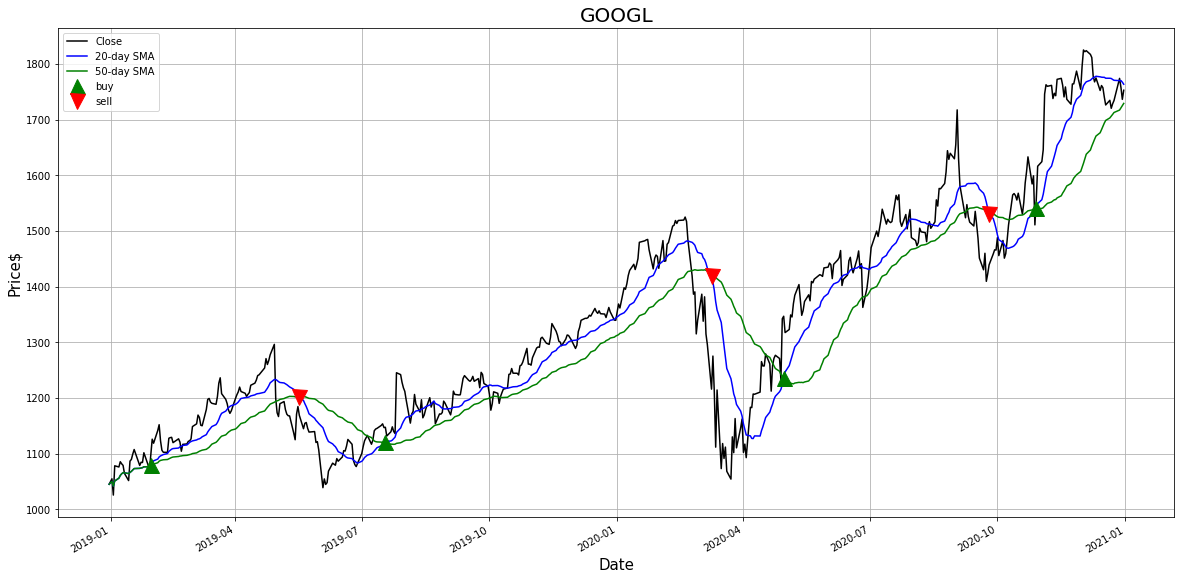

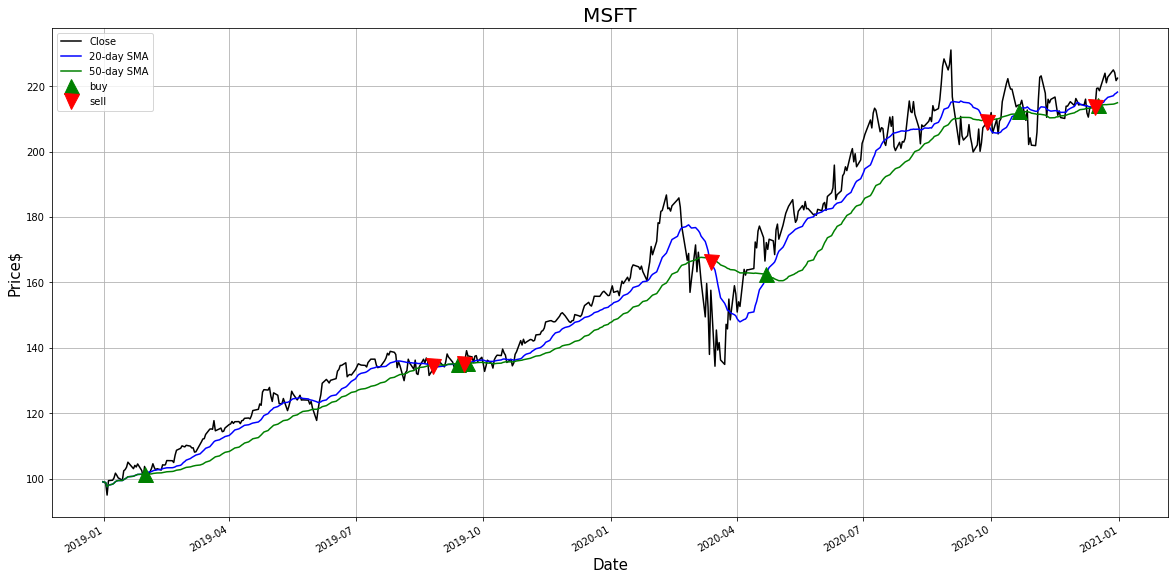

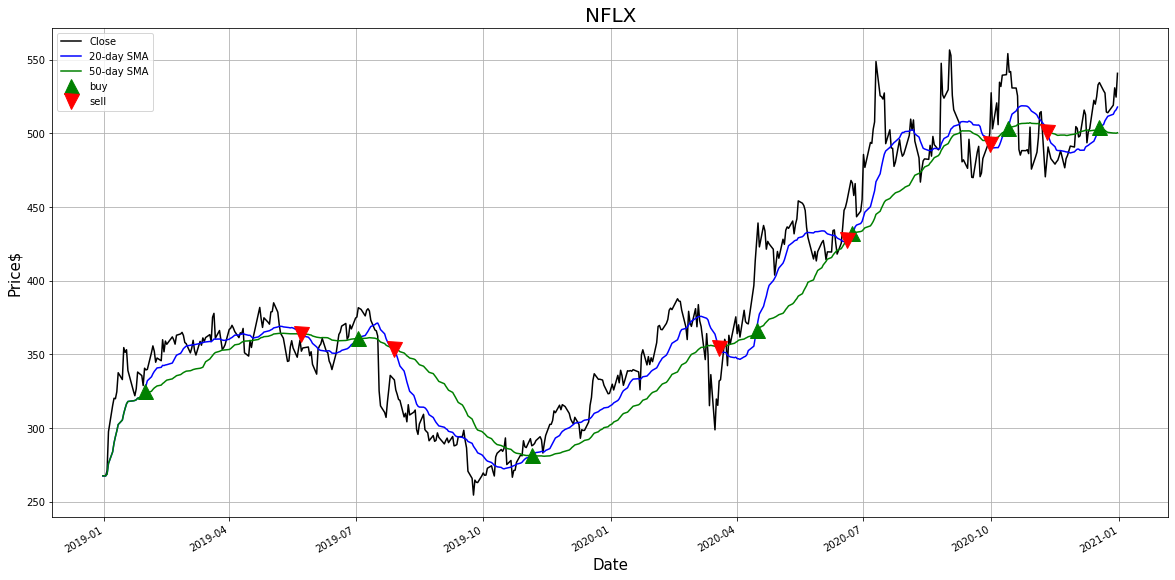

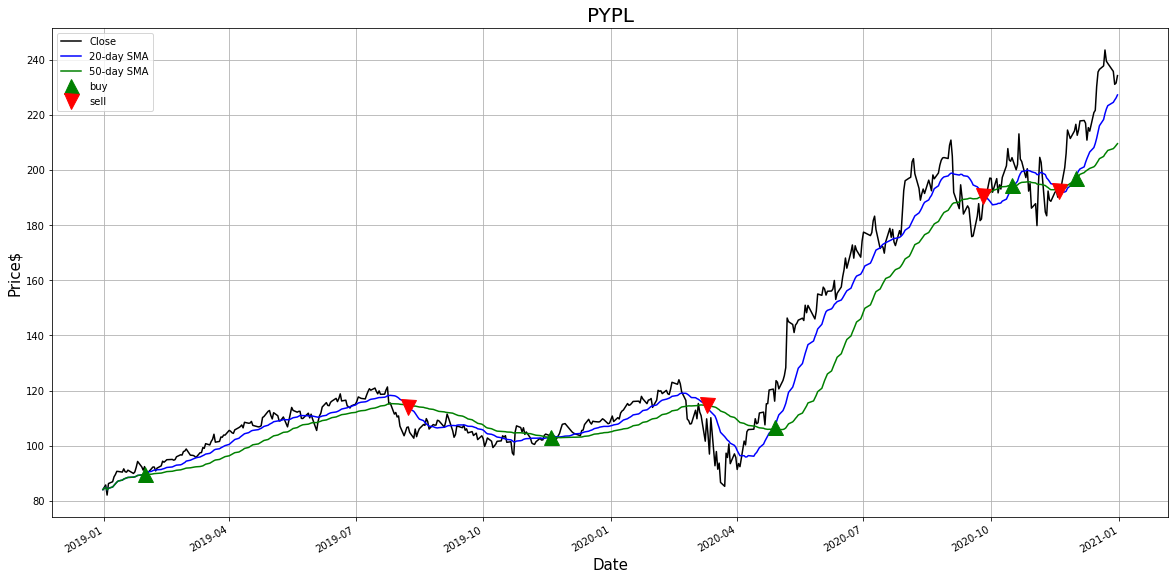

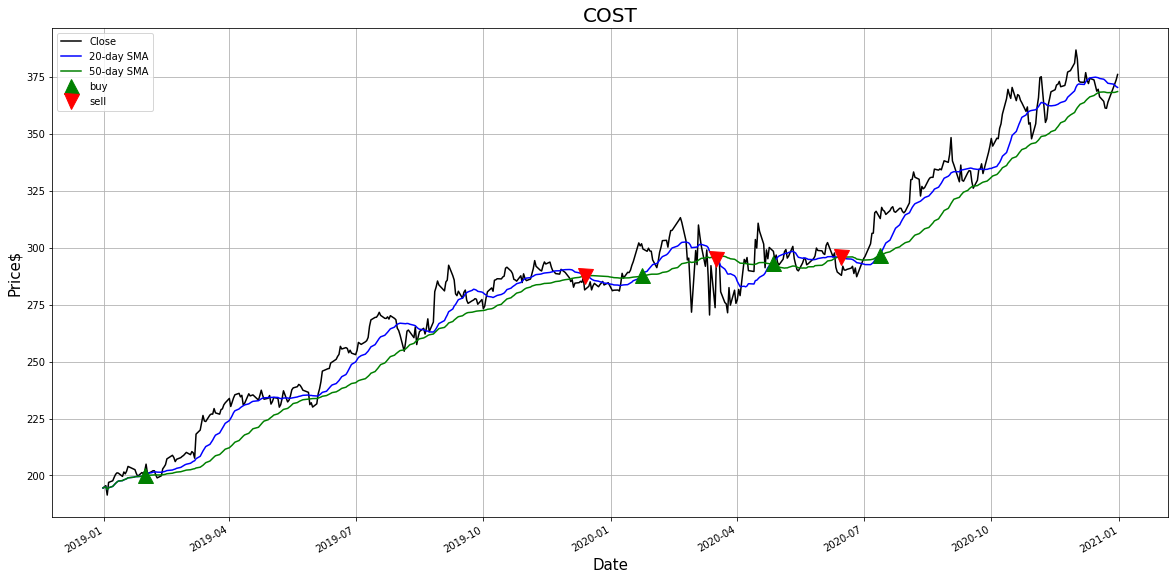

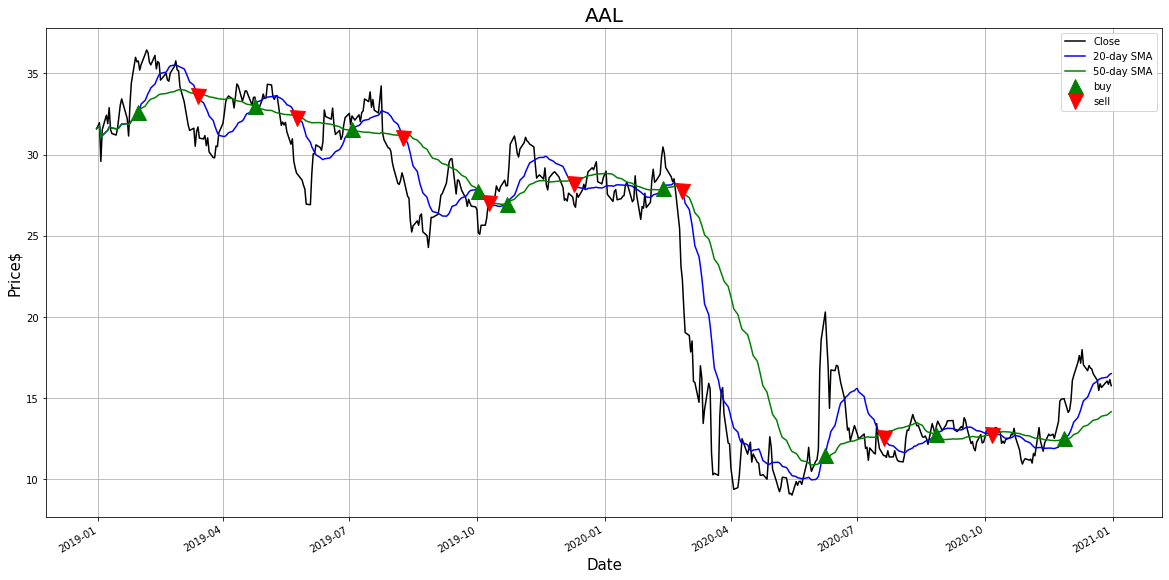

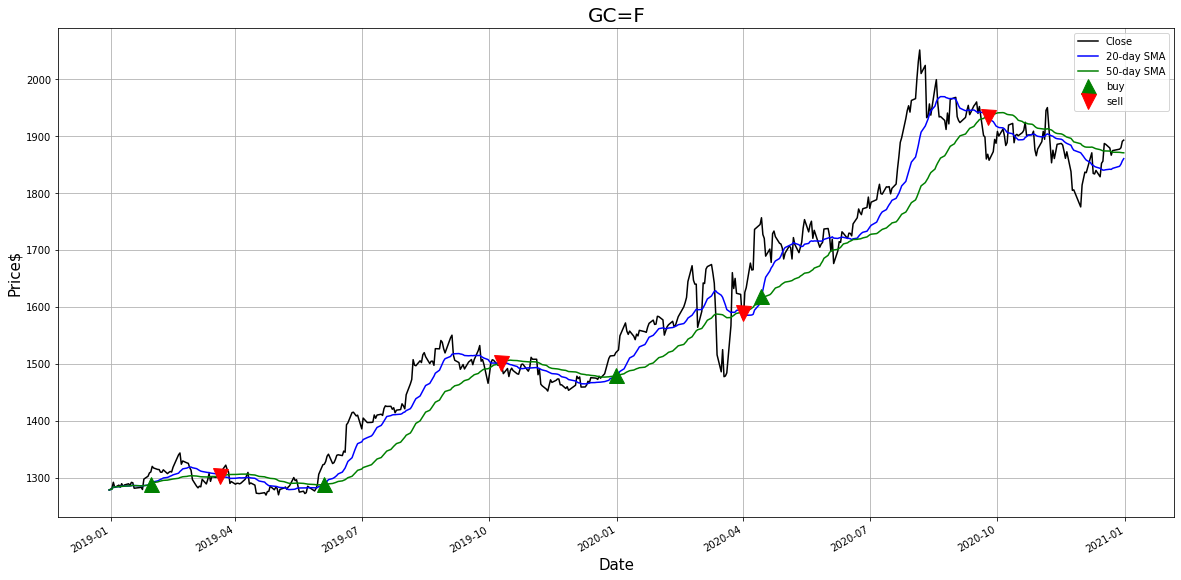

In [33]:
for i in range(len(num_name)):
    plotMA(i)